# Word Frequency of The Silmarillion

## 1. Install necessary libraries

What are the most frequent words in J.R.R. Tolkien's The Silmarillion and how often do they occur?

In this notebook, we'll scrape the text from here (https://archive.org/stream/fegmcfeggerson_gmail_4731/473%20%281%29_djvu.txt) using the Python package requests. Then we'll extract words from this web data using BeautifulSoup and then analyze the distribution of words using the Natural Language ToolKit (nltk). Finally, we'll create a word cloud of most frequesnt words over an outline of a shield. 

In [1]:
import nltk
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.text import Text
from nltk.corpus import brown
import requests
from bs4 import BeautifulSoup
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Nick\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Nick\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Nick\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Nick\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Nick\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |   

True

## 2. Get the document text

To analyze the text, we need to get the contents from somewhere. Luckily, it's freely available online.

To get the .txt file we're going to use the request package to make a 'GET' request. This is what you're doing through a browser when visiting a webpage, but here we're getting the requested page directly to python instead. 

In [2]:
# Getting the HTML 
r = requests.get('https://archive.org/stream/fegmcfeggerson_gmail_4731/473%20%281%29_djvu.txt')

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# Printing the first 2000 characters in html
print(html[:2000])

<!DOCTYPE html>
<html lang="en">
<!-- __ _ _ _ __| |_ (_)__ _____
    / _` | '_/ _| ' \| |\ V / -_)
    \__,_|_| \__|_||_|_| \_/\___| -->
  <head>
    <title>Full text of &quot;The Silmarillion&quot;</title>

          <meta name="viewport" content="width=device-width, initial-scale=1.0"/>
    
        <meta name="google-site-verification" content="Q2YSouphkkgHkFNP7FgAkc4TmBs1Gmag3uGNndb53B8" />
    <meta name="google-site-verification" content="bpjKvUvsX0lxfmjg19TLblckWkDpnptZEYsBntApxUk" />

    <script>window.archive_setup=[]</script>
    <meta charset="UTF-8">
    <script src="//archive.org/includes/jquery-1.10.2.min.js?v1.10.2" type="text/javascript"></script>
            <script src="//archive.org/includes/analytics.js?v=d9063d7" type="text/javascript"></script>

    <script>
      'use strict';
      if ('archive_analytics' in window) {
                  archive_analytics.service = "ao_2";
        
        archive_analytics.send_pageview_on_load({
                      mediaType

### 3. Get the text only from the HTML

This HTML is not quite in the format we want, though it does contain the text we need. We need to wrangle this HTML to extract the text of the document only. We'll use the package BeautifulSoup. After creating the "soup", we can use its .get_text() method to extract the text

In [3]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, 'html.parser')

# Getting the text out of the soup
text = soup.get_text()

# Printing out text between characters 9225 and 17345, which is only the document text
text = text[11410:722900]

text = text.replace('\INU LIN DALE ', 'Ainulindale')
text = text.replace('V alar', 'Valar')
text = text.replace('liuvatar', 'Iluvatar')
text = text.replace('Flelcaraxe', 'Helcaraxe')
text = text.replace('Ore-host', 'Orc-host')
text = text.replace("■WWW. TedNaSITlWf.com ESI la Led to the Walla — Copyright 3“ Ted Nasmith .Ml rights reserved.", "")
text = text.replace('Ores', 'Orcs')
text = text.replace('F inrod', 'Finrod')
text = text.replace('Beleglt Slain -a»wkhi 6 1M Ntimith. All ngbU n*rwd. ', '')
text = text.replace('Nam i HTn Hurin', 'Narn i Hin Hurin')
text = text.replace('MTm', 'Mim')
text = text.replace('Thprp is hlnnrl on thp hill-tnn ', 'There is blood on the hill-top')
text = text.replace('nnfi amnnn thpm Raid', 'one among them said:')
text = text.replace('KhTm', 'Khim')
text = text.replace('Flear', 'Hear')
text = text.replace('Ore-band', 'Orc-band')
text = text.replace('NulukkizdTn', 'Nulukkizdin')
text = text.replace('Tlnuviel', 'Tinuviel')
text = text.replace('WWW.TetlNasmith.com Tuor U l*d by the Swans lo Vinyamar - CupynthtCT**! Numltti AD i ','')
text = text.replace('Morqoth', 'Morgoth')
text = text.replace('Ore', 'Orc')
text = text.replace('Shadow/', 'Shadow')
text = text.replace('andmthe', 'and the')
text = text.replace('www.TedNasmith.com ', '')
text = text.replace('Maglor Coal* a Silmaril into the Sea - Copyright © Ted Nasmith. AH rights rnentd.', '')
text = text.replace('ofVingilotto', 'of Vingilot to')
text = text.replace('inArmenelos', 'in Armenelos')
text = text.replace('Tlrion', 'Tirion')
text = text.replace('Condor', 'Gondor')


print(text)

Ainulindale


The Music of the Ainur 


There was Eru, the One, who in Arda is called lluvatar; 
and he made first the Ainur, the Holy Ones, that were the 
offspring of his thought, and they were with him before 
aught else was made. And he spoke to them, propounding 
to them themes of music; and they sang before him, and he 
was glad. But for a long while they sang only each alone, or 
but few together, while the rest hearkened; for each 
comprehended only that part of me mind of lluvatar from 
which he came, and in the understanding of their brethren 
they grew but slowly. Yet ever as they listened they came to 
deeper understanding, and increased in unison and 
harmony. 

And it came to pass that lluvatar called together all the 
Ainur and declared to them a mighty theme, unfolding to 
them things greater and more wonderful than he had yet 
revealed; and the glory of its beginning and the splendour 
of its end amazed the Ainur, so that they bowed before 
lluvatar and were silent. 



## 4. Extract the words

Now that we have the text we need, it's time to count how many times each word appears using nltk – the Natural Language Toolkit. We'll start by tokenizing the text, that is, remove everything that isn't a word (whitespace, punctuation, etc.) and then split the text into a list of words.

In [4]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 8 words / tokens 
print(tokens[:8])

['Ainulindale', 'The', 'Music', 'of', 'the', 'Ainur', 'There', 'was']


## 5. Make all words lower-case

If there are indentical words in the text and one is lowercase and the other uppercase, they will both count as a different word. We don't want this to happen, so we'll build a list of all words in the text and make all words lowercase.

In [5]:
# A new list to hold the lowercased words
words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

# Printing out the first 8 words / tokens 
print(words[:8])

['ainulindale', 'the', 'music', 'of', 'the', 'ainur', 'there', 'was']


## 6. Load in stopwords

You'll want to remove words that appear a lot in the English language such as 'the', 'of' and 'a' because they're not interesting for this project. These are known as stop words. The package nltk includes a good list of stop words in English that we can use.

In [6]:
# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

# Printing out the first eight stop words
print(sw[:8])
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'suc

## 7. Remove stopwords

Create a new list with all words, except for stopwords (those words listed above in sw). One way to get this list is to loop over all elements of words and add each word to a new list if they are not in sw.

In [7]:
# A new list to hold the text with No Stop words
words_ns = []

# Appending to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Printing the first 5 words_ns to check that stop words are gone
print(words_ns[:5])

['ainulindale', 'music', 'ainur', 'eru', 'one']


## 8. Plot the frequencies of words

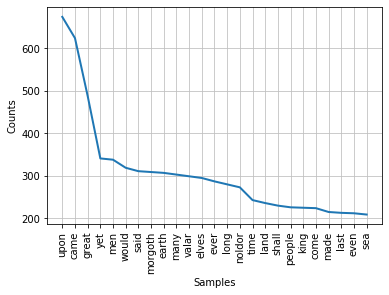

In [8]:
# This command display figures inline
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution
freqdist.plot(25)

## 9. Finally, we'll create a wordcloud using the most frequent words and superimpose those over a map of the USA.

In [ ]:
pip install wordcloud 

In [9]:
import numpy as np
from PIL import Image
from os import path

import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

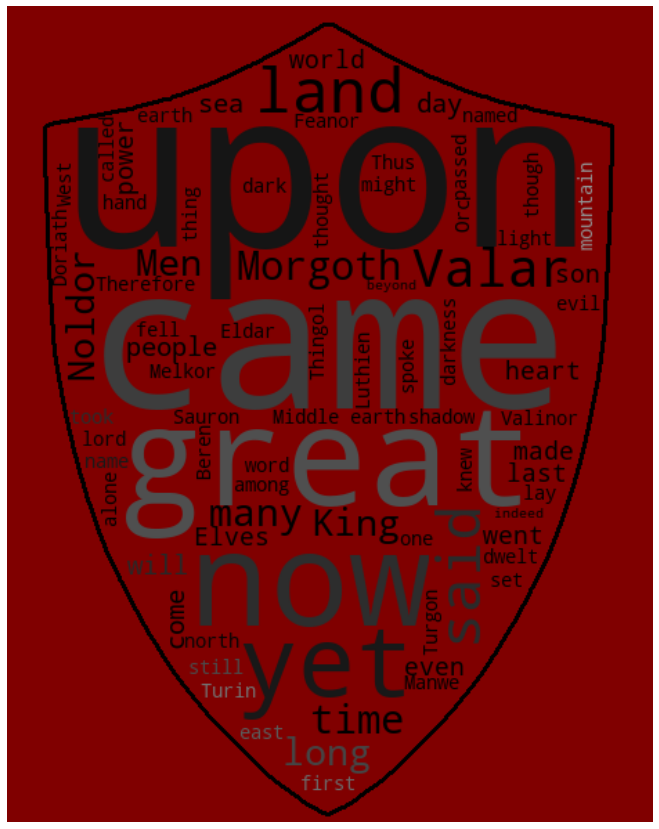

In [14]:
# Create an object of the image
mask = np.array(Image.open(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Silmarillion\Swords.png'))

# Construct the wordcloud
wc = WordCloud(max_font_size=300, min_font_size=8, max_words=80, mask=mask, background_color='maroon', contour_width=2, contour_color='black').generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,15])
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Silmarillion\Silmarillion_wordcloud.png')